In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('../Data//Child-Data2017.csv', na_values='?')
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
data.drop(['age_desc'] ,  axis = 1, inplace = True)
data.drop(['id'] ,  axis = 1, inplace = True)
data.replace("?",np.nan,inplace=True) #replace ? with nan

In [ ]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
age,4,1.369863
Class/ASD,0,0.000000
A9_Score,0,0.000000
A2_Score,0,0.000000
A3_Score,0,0.000000
A4_Score,0,0.000000
A5_Score,0,0.000000
A6_Score,0,0.000000
A7_Score,0,0.000000
A8_Score,0,0.000000


#### Missing Data mean value  or dropna()

In [ ]:
data.loc[(data['age'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
32,1,0,0,1,0,1,1,1,1,1,NaN,1,10,0,0,13,0,7,4,1
65,0,0,1,0,0,0,0,0,0,0,NaN,1,4,0,0,24,0,1,1,0
126,1,1,1,1,0,1,0,1,0,1,NaN,1,10,1,0,24,0,7,4,1
138,0,1,1,0,1,1,1,1,0,0,NaN,1,10,1,0,39,1,6,4,0


In [ ]:
data.age[32]=data.age.median()
data.age[65]=data.age.median()
data.age[126]=data.age.median()
data.age[138]=data.age.median()
data.loc[(data['age'].isnull())]

C:\Users\Basma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Basma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Basma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Basma\Anac

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD


## ANOVA

In [ ]:
X_Feature = data.iloc[:,0:19]  #independent columns
Y_Feature = data.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

            Feature       Score
0          A1_Score   53.141947
1          A2_Score   16.056199
2          A3_Score   53.787686
3          A4_Score  138.483811
4          A5_Score   48.900964
5          A6_Score   61.138658
6          A7_Score   23.529810
7          A8_Score   68.993060
8          A9_Score   89.757345
9         A10_Score   69.600217
10              age    1.650605
11           gender    0.436834
12        ethnicity    0.091082
13          jundice    0.182080
14           austim    0.692273
15    contry_of_res    0.243441
16  used_app_before    0.647843
17           result  672.421793
18         relation    4.736193


In [ ]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
            Feature       Score
17           result  672.421793
3          A4_Score  138.483811
8          A9_Score   89.757345
9         A10_Score   69.600217
7          A8_Score   68.993060
5          A6_Score   61.138658
2          A3_Score   53.787686
0          A1_Score   53.141947
4          A5_Score   48.900964
6          A7_Score   23.529810
1          A2_Score   16.056199
18         relation    4.736193
10              age    1.650605
14           austim    0.692273
16  used_app_before    0.647843


## Chi

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1_Score,16.570951
1,A2_Score,7.134778
2,A3_Score,11.734209
3,A4_Score,42.338541
4,A5_Score,10.821959
5,A6_Score,14.625696
6,A7_Score,8.630529
7,A8_Score,28.251186
8,A9_Score,34.980461
9,A10_Score,15.483910


In [ ]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
            Feature       Score
17           result  170.110548
3          A4_Score   42.338541
8          A9_Score   34.980461
7          A8_Score   28.251186
0          A1_Score   16.570951
9         A10_Score   15.483910
5          A6_Score   14.625696
2          A3_Score   11.734209
4          A5_Score   10.821959
6          A7_Score    8.630529
1          A2_Score    7.134778
18         relation    4.047946
15    contry_of_res    2.461490
10              age    1.431854
16  used_app_before    0.626338


## correlation

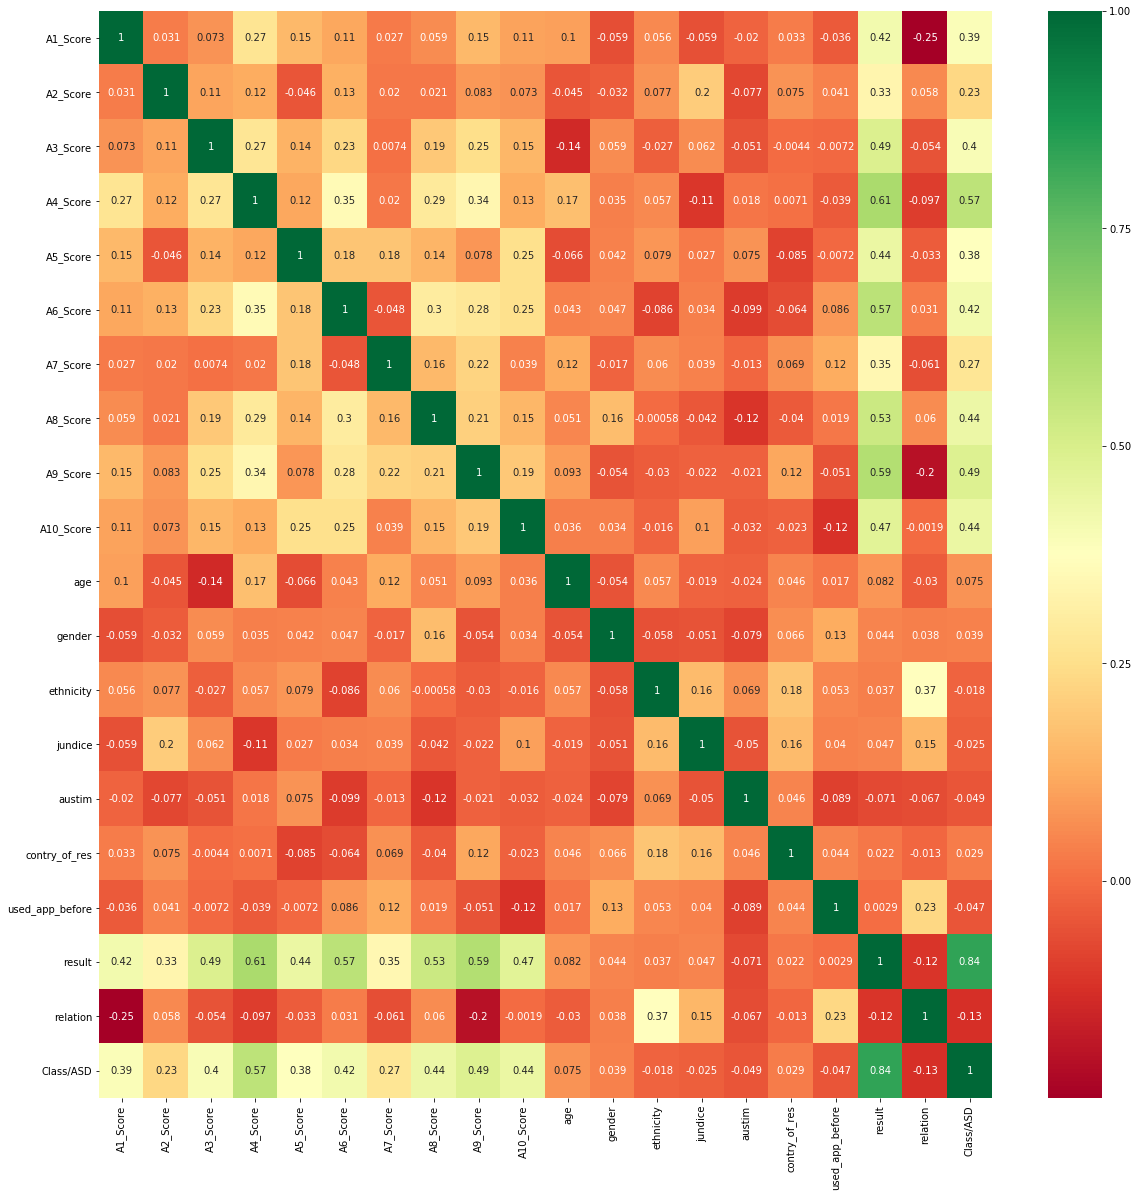

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")